In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
train_path = "train.csv"
data_titanic = pd.read_csv(train_path,index_col = "PassengerId")

# Context
    These data represent survivors and non-survivors from the Titanic.
    The data of the persons are charachterized by gender, age, ticket number, etc. (Total 12 columns)
    Goal/Target for data analisis is find the parametrs wich give us chance to survive Titanic or smt like that




In [3]:
data_titanic.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
5,0,2,"Sassano, Jonathan",male,35.00,0,0,13363,6.71,NaN,S
6,0,3,"Conway, Jose",male,7.00,0,0,A/5,9.77,NaN,S
7,1,3,"Werner, Linda",female,6.00,1,2,434426,31.50,NaN,S
8,0,1,"Wardlaw, Michael",male,27.00,2,1,474849,73.02,A7253,S


    We can see wich decks survive the most
        -First class cabins were located on decks from A to E 
        -Second class cabins were located on decks from D to G
        -Third class cabins were located on decks from D to G


    Folding boats were designed for 47 people each. The total capacity of the boats was 1,178 people, while the steamer was designed for 2,556 passengers and 908 crew members
    
    
    

# Data quality assessment
    Here we will speak about our data.

1. – Cheking uniq values and data 

    1.1. As we see below,there is some nonunic name+surnames combinations.We can't drop them as they not duplicated rows.For example, here are the strings with the name "Adams, Charles".

In [4]:
titanic_unic_names = data_titanic.groupby("Name").size()
titanic_unic_names[titanic_unic_names > 1].count()
data_titanic = data_titanic.drop_duplicates()
titanic_unic_names = data_titanic.groupby("Name").size()
titanic_unic_names[titanic_unic_names > 1].count()
data_titanic[data_titanic.Name == "Adams, Charles"]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
4756,0,3,"Adams, Charles",male,43.0,0,0,448854,24.48,NaN,S
53997,0,3,"Adams, Charles",male,24.0,0,0,46829,6.19,NaN,S
65259,0,2,"Adams, Charles",male,51.0,1,1,4121045,12.23,NaN,S
73925,1,3,"Adams, Charles",male,7.0,1,0,A/5,12.69,NaN,S
83604,1,1,"Adams, Charles",male,61.0,0,0,SC/AH 423519,54.77,B11325,Q



2. – Cheking Nan values and replasing them or droping 

In [5]:
data_titanic.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age          3292
SibSp           0
Parch           0
Ticket       4623
Fare          134
Cabin       67866
Embarked      250
dtype: int64

    -  Age colum. We will replace age missing data with mean of this data,becouse its will not affect so strong the reserch it will be like 3%(3292(count of NAN in age)/100000(row count))

In [6]:
data_titanic["Age"] = data_titanic["Age"].fillna(round(data_titanic["Age"].mean(),0))

    - Ticket collum.I don't know what to link the tickets to and where to get the values from.So just ingnore the values, although in general it was possible to take mode or generate your own values.

In [7]:
data_titanic["Ticket"] = data_titanic["Ticket"].fillna("No")

    - Fare colum. Change Nan to mean value.

In [8]:
data_titanic["Fare"] = data_titanic["Fare"].fillna(data_titanic["Fare"].mean())

    - Cabin column.As we can see, the amount of missing data in the cabin column does not allow us to qualitatively investigate using this column, and if we replace it with average or mode, it will negatively affect the quality.so the solution is simply not to use this column in the investigation or use it to a minimum.

In [9]:
data_titanic["Cabin"] = data_titanic["Cabin"].fillna("NO")

    - Embarked      

In [10]:
#data_titanic = data_titanic.dropna()
data_titanic["Embarked"] = data_titanic["Embarked"].fillna(str(data_titanic.Embarked.mode()[0]))

    Result of changing NAN

In [11]:
data_titanic.isnull().values.any()

False

3. – Cheking colums types and changing it

    

In [12]:
data_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       100000 non-null  float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    100000 non-null  object 
 8   Fare      100000 non-null  float64
 9   Cabin     100000 non-null  object 
 10  Embarked  100000 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


    3.1 Changing choise values to numeric

    

In [13]:
Sex_data = pd.DataFrame({'Sex': ["male", "female"], 'Sex_id': [0, 1]})
data_titanic = data_titanic.merge(Sex_data,left_on = "Sex" 
                                                  ,right_on = "Sex" 
                                                  ,how = "left" )
data_titanic.drop(axis=1, index=None, columns=["Sex"],inplace=True)
Embark_data = pd.DataFrame({'Embarked': ["S", "Q","C"], 'Embark_id': [0, 1,2]})
data_titanic = data_titanic.merge(Embark_data,left_on = "Embarked" 
                                                  ,right_on = "Embarked" 
                                                  ,how = "left" )
Embark_data = pd.DataFrame({'Embarked': ["Southampton", "Queenstown","Cherbourg"], 'Embark_id': [0, 1,2]})
data_titanic.drop(axis=1, index=None, columns=["Embarked"],inplace=True)
data_titanic.head(10)

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_id,Embark_id
0,1,1,"Oconnor, Frankie",38.00,2,0,209245,27.14,C12239,0,0
1,0,3,"Bryan, Drew",38.00,0,0,27323,13.35,NO,0,0
2,0,3,"Owens, Kenneth",0.33,1,2,CA 457703,71.29,NO,0,0
3,0,3,"Kramer, James",19.00,0,0,A. 10866,13.04,NO,0,0
4,1,3,"Bond, Michael",25.00,0,0,427635,7.76,NO,0,0
5,0,2,"Sassano, Jonathan",35.00,0,0,13363,6.71,NO,0,0
6,0,3,"Conway, Jose",7.00,0,0,A/5,9.77,NO,0,0
7,1,3,"Werner, Linda",6.00,1,2,434426,31.50,NO,1,0
8,0,1,"Wardlaw, Michael",27.00,2,1,474849,73.02,A7253,0,0
9,0,2,"Greigo, Rudy",66.00,0,0,6981,9.14,D2969,0,2


# Data exploration
    let's find the correlation

<AxesSubplot:>

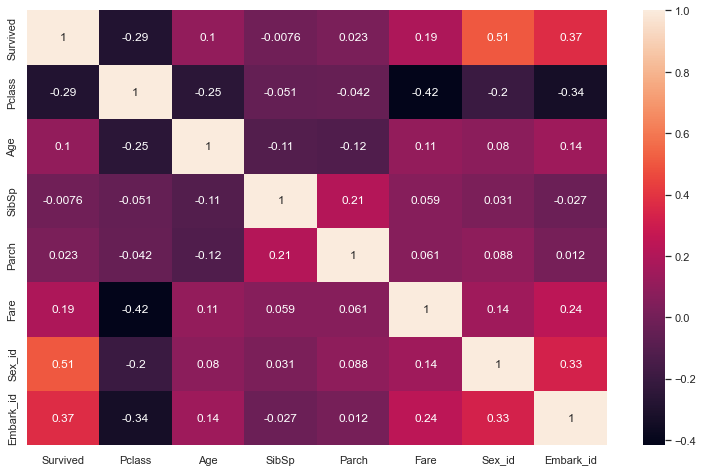

In [21]:
sns.set(rc = {'figure.figsize':(13,8)})
data_titanic.isnull().values.any() 
sns.heatmap(data_titanic.corr(), annot=True)

    Our target is to find the best characteristics to survive the Titanic.
        Survived to (Sex, Embarked, Pclass, fare, Age) Another claim have smell like <= 0.1 values. This column we will use for research survive ability on the titanic. I really want to use cabin to find survive ability (In my opinion, the deck would greatly affect survival), but I can't use this because of the large amount of missing data. If I generate or reconnect with fare or a ticket it will lower the quality of research.
        
    1. First,we check survived and unsurvived count
        
    

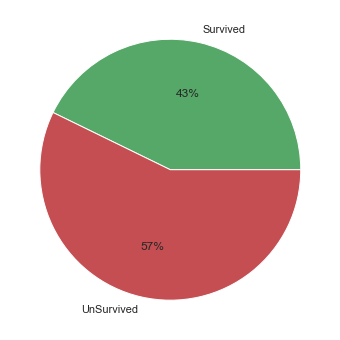

In [15]:
sns.set(rc = {'figure.figsize':(6,6)})
data_survived = [len(data_titanic[data_titanic.Survived == True]),len(data_titanic[data_titanic.Survived == False])]
labels = ['Survived', 'UnSurvived']
#print(len(data_titanic) - len(data_titanic[data_titanic.Survived == True]) - len(data_titanic[data_titanic.Survived == False]))
plt.pie(data_survived, labels = labels, colors = ["g","r"], autopct='%.0f%%')
plt.show()

    As seen on a pie the 57% is unescaped the tragedy.
   
    2. Second, we will sea survive ability to age groups
        2.1. Boxplot to see age distribution
        2.2. Survive ability to age groups

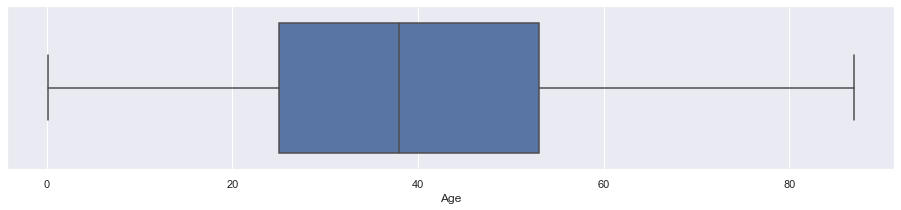

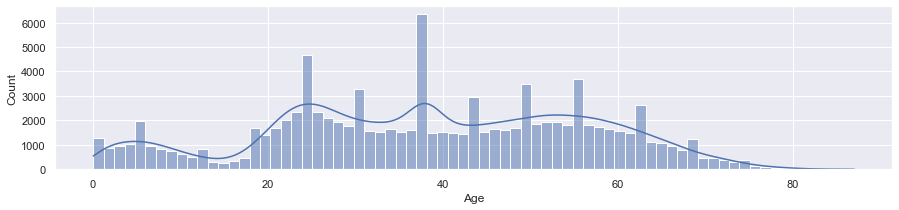

In [16]:
sns.set(rc = {'figure.figsize':(15.9,3)})
sns.boxplot(x = data_titanic.Age)
plt.show()
sns.set(rc = {'figure.figsize':(15,3)})
sns.histplot(data_titanic['Age'],kde=True) 
plt.show()

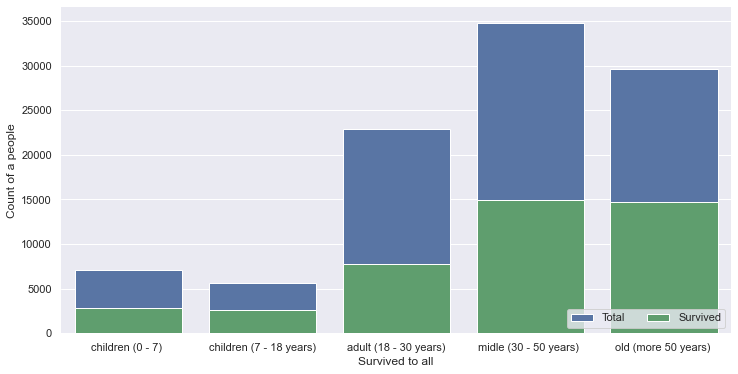

In [43]:


f,ax = plt.subplots(figsize=(12, 6))
Age_count = data_titanic[["Age","Survived"]].groupby("Age").count()["Survived"].rename("count")
Age_categories =  ["children (0 - 7) ","children (7 - 18 years)","adult (18 - 30 years)","midle (30 - 50 years) ","old (more 50 years) "]

small_children_count_all = Age_count[(Age_count.index >= 0) & (Age_count.index <= 7)].sum()
children_count_all = Age_count[(Age_count.index > 7) & (Age_count.index <= 18)].sum()
adult_count_all = Age_count[(Age_count.index > 18) & (Age_count.index <= 30)].sum()
midle_count_all = Age_count[(Age_count.index > 30) & (Age_count.index <= 50)].sum()
old_count_all = Age_count[(Age_count.index > 50)].sum()
#print(children_count + adult_count + midle_count + old_count)
sns.barplot(x = Age_categories,
            y = [small_children_count_all,children_count_all,adult_count_all,midle_count_all,old_count_all],
            label="Total",
            color="b")

Age_count_surv = data_titanic[["Age","Survived"]][data_titanic.Survived == True].groupby("Age").count()["Survived"].rename("count")
small_children_count_surv = Age_count_surv[(Age_count_surv.index >= 0) & (Age_count_surv.index <= 7)].sum()
children_count_surv = Age_count_surv[(Age_count_surv.index > 7) & (Age_count_surv.index <= 18)].sum()
adult_count_surv = Age_count_surv[(Age_count_surv.index > 18) & (Age_count_surv.index <= 30)].sum()
midle_count_surv = Age_count_surv[(Age_count_surv.index > 30) & (Age_count_surv.index <= 50)].sum()
old_count_surv = Age_count_surv[(Age_count_surv.index > 50)].sum()
#print(children_count_surv + adult_count_surv + midle_count_surv + old_count_surv)
sns.barplot(x = Age_categories,
            y = [small_children_count_surv,children_count_surv,adult_count_surv,midle_count_surv,old_count_surv],
            label="Survived",
            color="g")

ax.legend(ncol=3, loc="lower right", frameon=True)
ax.set( ylabel="Count of a people",
       xlabel="Survived to all")
sns.despine(left=True, bottom=True)


    As we see on this histogram like a half from children and the old group survived, the most deadly group is adults and the middle group.
    
    3. The third thing we'll look at is fare


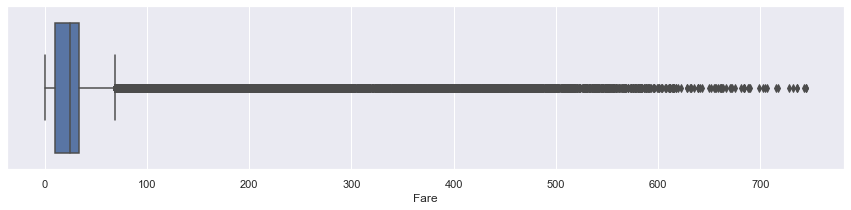

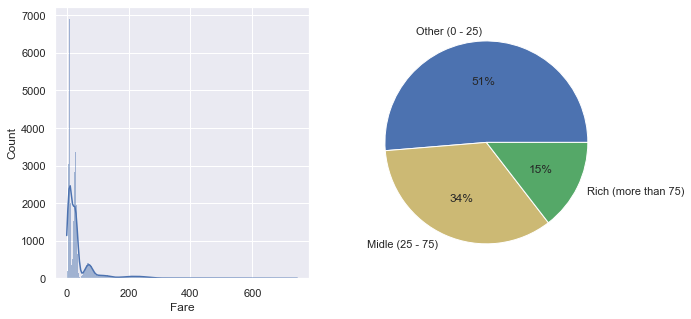

In [18]:
sns.set(rc = {'figure.figsize':(12,6)})
data_total = [len(data_titanic[data_titanic.Fare <= 25]),
                 len(data_titanic[(data_titanic.Fare <= 75) & (data_titanic.Fare > 25)]),
                 len(data_titanic[data_titanic.Fare > 75])]

labels = ['Other (0 - 25)',"Midle (25 - 75) ", 'Rich (more than 75)']
sns.set(rc = {'figure.figsize':(15,3)})
sns.boxplot(x = data_titanic.Fare)
plt.show()
sns.set(rc = {'figure.figsize':(10,5)})
fig, axs = plt.subplots(ncols=2)
sns.histplot(data_titanic['Fare'],ax = axs[0],kde=True) 
plt.pie(data_total, labels = labels, colors = ["b","y","g"], autopct='%.0f%%')
plt.show()

    The survivability compare by fare


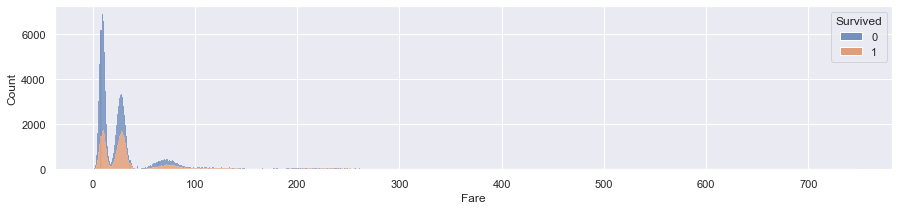

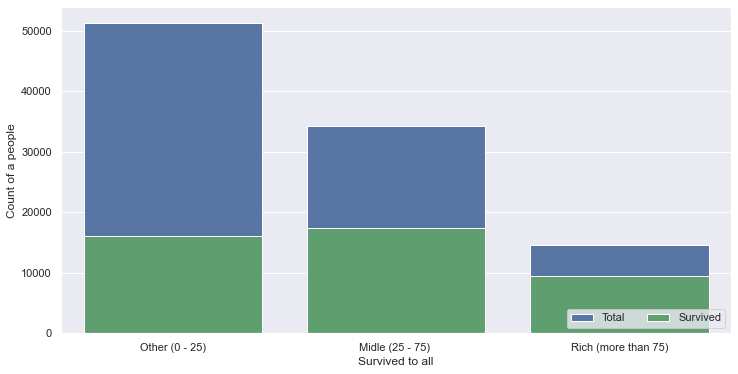

In [19]:
sns.set(rc = {'figure.figsize':(15,3)})
sns.histplot(data=data_titanic, x="Fare",hue = "Survived" ,multiple="stack" )
plt.show()
f,ax = plt.subplots(figsize=(12, 6))
sns.barplot(x = labels,
            y = data_total,
            label="Total",
            color="b")


data_survived = [len(data_titanic[(data_titanic.Fare <= 25) & (data_titanic.Survived == True)]),
                 len(data_titanic[(data_titanic.Fare <= 75) & (data_titanic.Fare > 25) & (data_titanic.Survived == True)]),
                 len(data_titanic[(data_titanic.Fare > 75)  & (data_titanic.Survived == True)])]
#print(children_count_surv + adult_count_surv + midle_count_surv + old_count_surv)
sns.barplot(x = labels,
            y = data_survived,
            label="Survived",
            color="g")

ax.legend(ncol=3, loc="lower right", frameon=True)
ax.set( ylabel="Count of a people",
       xlabel="Survived to all")
plt.show()

    The best way to survive is to be very rich
    
    4. The survivability by Pclass
    

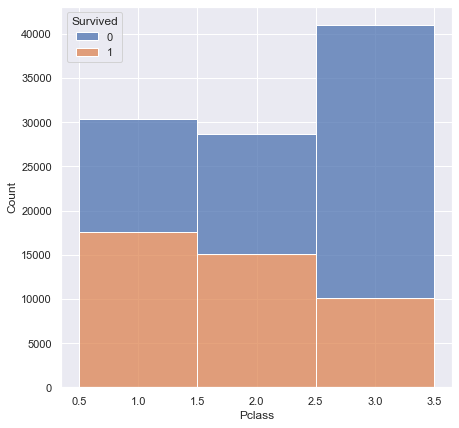

In [20]:

sns.set(rc = {'figure.figsize':(7,7)})
sns.histplot(data=data_titanic, x="Pclass",hue = "Survived", multiple="stack" ,discrete=True)
plt.show()

    The best way to survive is to be very rich.Likewise to fare. The best class is first class to be alive.
    
    5. The survivability by Embarked port.
    

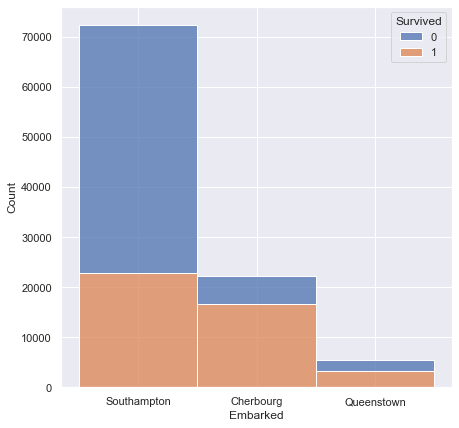

In [24]:

sns.set(rc = {'figure.figsize':(7,7)})
sns.histplot(data= data_titanic.merge(Embark_data,left_on = "Embark_id" ,right_on = "Embark_id" ,how = "left" ),
             x="Embarked",
             hue = "Survived",
             multiple="stack" ,
             discrete=True)
plt.show()

    Thas very strange,but if you embarked in "Queenstown" or "Cherbourg" you could survive,we need to analyze this some another colums to understand ulogical connection.
    
    6. The survivability by male.
    

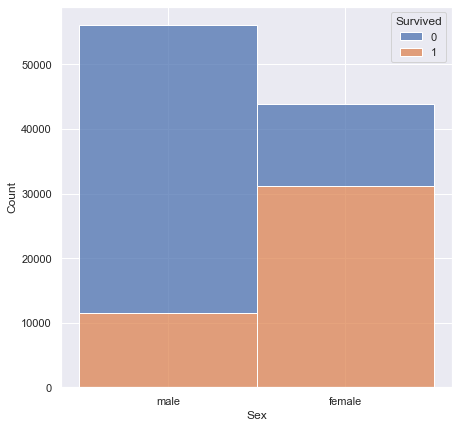

In [40]:

sns.set(rc = {'figure.figsize':(7,7)})
sns.histplot(data= data_titanic.merge(Sex_data,left_on = "Sex_id" ,right_on = "Sex_id" ,how = "left" ),
             x="Sex",
             hue = "Survived",
             multiple="stack" ,
             discrete=True)
plt.show()

    Intersting fact capitan give order to rescue female and children first then other,so this is not strange.
    
    6. The survivability by male.
    

# Summary